# preprocessing


In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')



Mounted at /content/drive


display records of test.csv

In [2]:
import pandas as pd

# Load the dataset from a CSV file
data = pd.read_csv('/content/drive/My Drive/test.csv')

# Display the first few rows of the dataset to understand its structure
data.head()


,id,article,highlights
0,8aa8d3d042356a88d25ee6fb13347184858fe770,(RollingStone.com) -- Britney Spears announce...,Britney Spears and producers still choosing so...
1,b3a6c45ccbcc6140a9fe042a385440e3a80535dc,"By . Sam Adams . PUBLISHED: . 04:02 EST, 18 Ju...",Car owners would be liable even if they don't ...
2,f90015991bcec3013e502044699046581088f1a5,It is a single moment of horrifying barbarism ...,The picture was posted on a pro-government web...
3,0e029a3f67dc8df34eefc185ec5343cec72fb29d,An elderly Minnesota couple were killed after ...,"Carlton and Hazel Roed of Mentor, Minnesota, w..."
4,b244323ba60a10baf71a72a30ffed5162f3b2050,(CNN) -- Columbus Day often brings to mind the...,Seattle and Minneapolis will celebrate Indigen...


preprocessed the test.csv and saved in demo.csv
methods:convert to lowercase,tokenize,remove stopwords


In [6]:
import pandas as pd  # For data manipulation and analysis
import re  # For text processing using regular expressions
import nltk  # For natural language processing
from nltk.tokenize import word_tokenize  # For tokenizing text
from nltk.corpus import stopwords  # For removing stopwords
from tqdm import tqdm  # For displaying a progress bar


 # Download the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    # Remove special characters and junk using regex
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

def tokenize(text):
    # Tokenize the text into words
    return word_tokenize(text)

def remove_stopwords(tokens):
    # Define a set of stopwords in English
    stop_words = set(stopwords.words('english'))
    # Remove stopwords from the list of tokens
    return [token for token in tokens if token not in stop_words]

def preprocess_text(text):
    # Clean the text to remove special characters and convert to lowercase
    cleaned_text = clean_text(text)
    # Tokenize the cleaned text
    tokens = tokenize(cleaned_text)
    # Remove stopwords from the list of tokens
    tokens = remove_stopwords(tokens)
    # Join the tokens back into a single string
    return ' '.join(tokens)

def main():
    # Load the dataset from a CSV file
    data = pd.read_csv('/content/drive/My Drive/test.csv')

    # Initialize a new DataFrame to store processed data
    processed_data = pd.DataFrame(columns=['id', 'article', 'highlight'])

    # Iterate over each row in the dataset with a progress bar
    for index, row in tqdm(data.iterrows(), total=len(data), desc="Processing data"):
        # Preprocess the article text
        cleaned_article = preprocess_text(row['article'])
        # Preprocess the highlight text
        cleaned_highlight = preprocess_text(row['highlights'])
        # Concatenate the processed row to the new DataFrame
        processed_data = pd.concat([processed_data, pd.DataFrame({'id': [row['id']], 'article': [cleaned_article], 'highlight': [cleaned_highlight]})], ignore_index=True)

    # Save the processed data to a new CSV file
    processed_data.to_csv('/content/drive/My Drive/demo.csv', index=False)

    print("Processing completed. Processed data saved to 'demo.csv'.")

if __name__ == "__main__":
    # Run the main function
    main()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Processing data: 100%|██████████| 11490/11490 [01:04<00:00, 177.34it/s]


Processing completed. Processed data saved to 'demo.csv'.


display records after preprocess

In [8]:
data = pd.read_csv('/content/drive/My Drive/demo.csv')
data.head()



,id,article,highlight
0,8aa8d3d042356a88d25ee6fb13347184858fe770,rollingstonecom britney spears announced today...,britney spears producers still choosing songs ...
1,b3a6c45ccbcc6140a9fe042a385440e3a80535dc,sam adams published 0402 est 18 july 2012 upda...,car owners would liable even dont know dropped...
2,f90015991bcec3013e502044699046581088f1a5,single moment horrifying barbarism provides fl...,picture posted progovernment website lebanon b...
3,0e029a3f67dc8df34eefc185ec5343cec72fb29d,elderly minnesota couple killed car collided h...,carlton hazel roed mentor minnesota 2009 chevy...
4,b244323ba60a10baf71a72a30ffed5162f3b2050,cnn columbus day often brings mind nina pinta ...,seattle minneapolis celebrate indigenous peopl...


### checking spelling mistake using pyspellchecker

In [10]:
!pip install pyspellchecker

from spellchecker import SpellChecker


# Load demo.csv
demo_data = pd.read_csv('/content/drive/My Drive/demo.csv')

# Initialize SpellChecker
spell = SpellChecker()

# Function to check spelling in a text
def check_spelling(text):
    misspelled = spell.unknown(text.split())
    return misspelled

# Check spelling in the first two records
for i in range(2):
    article = demo_data.iloc[i]['article']
    highlight = demo_data.iloc[i]['highlight']
    misspelled_article = check_spelling(article)
    misspelled_highlight = check_spelling(highlight)

    print(f"Record {i+1}:")
    print("Article spelling mistakes:", misspelled_article)
    print("Highlight spelling mistakes:", misspelled_highlight)
    print()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 25.9 MB/s eta 0:00:00
Record 1:
Article spelling mistakes: {'blanco', 'dancepop', 'thats', 'coproduced', 'california', 'ivey', 'tok', 'angeles', 'arent', 'bloodshy', 'easytolistento', 'los', 'swedish', 'hudson', 'sheffields', 'montreal', 'superpop', 'mckee', 'fatale', 'coproducing', 'fourstar', 'ar', 'ive', 'luke', 'cowritten', 'kiis', 'taio', 'dr', 'didnt', 'wasnt', 'rollingstonecom', 'trans', 'max', 'videobreakdowndance', 'conway', 'midjanuary', 'britney', 'perrys', 'cruz', 'kehas', 'katy', 'gurls', 'tik', 'britneys'}
Highlight spelling mistakes: {'britney', 'fatale'}

Record 2:
Article spelling mistakes: {'offence', 'adams', 'spelman', 'american', 'europe', 'aa', 'rubbishstrewn', 'england', 'july', 'britains', 'marlesford', 'london', 'est', 'sam', 'cctv', 'caroline', 'countrys', 'britain', 'bryson'}
Highlight spelling mistakes: {'britains', 'europe', 'dont'}



## splitting dataset to train test and validate

In [11]:
#to split a dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Load demo.csv
data = pd.read_csv('/content/drive/My Drive/demo.csv')

# Split the data into train (70%), test (15%), and validate (15%)
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
validate_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Save the splits to separate CSV files
train_data.to_csv('train_data1.csv', index=False)
validate_data.to_csv('validate_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

print("Data has been split into train, validate, and test sets and saved to CSV files.")


Data has been split into train, validate, and test sets and saved to CSV files.


In [14]:
# Print the total number of records in each dataset
print(f"Total records in main dataset: {len(data)}")
print(f"Total records in training set: {len(train_data)}")
print(f"Total records in validation set: {len(validate_data)}")
print(f"Total records in test set: {len(test_data)}")


Total records in main dataset: 11490
Total records in training set: 8043
Total records in validation set: 1723
Total records in test set: 1724


graph to show total records in each dataset

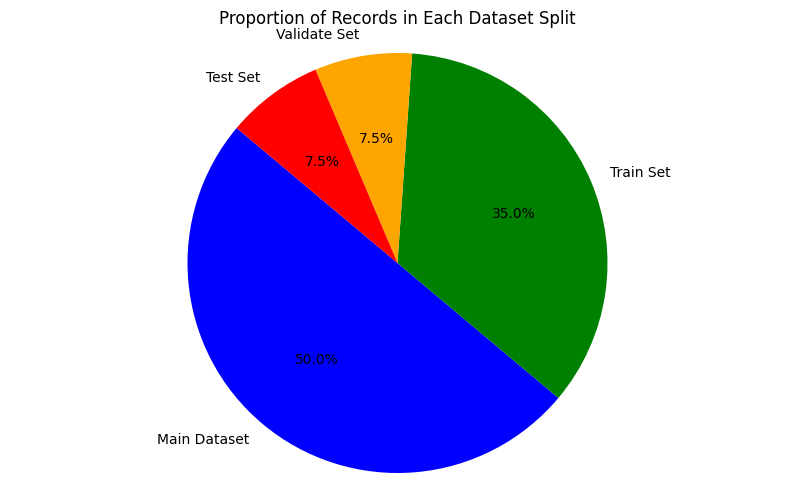

In [12]:
import matplotlib.pyplot as plt  # For plotting graphs
# Get the count of records in each set
counts = {
    'Main Dataset': len(data),
    'Train Set': len(train_data),
    'Validate Set': len(validate_data),
    'Test Set': len(test_data)
}

# Draw a pie chart
plt.figure(figsize=(10, 6))
plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'orange', 'red'])
plt.title('Proportion of Records in Each Dataset Split')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

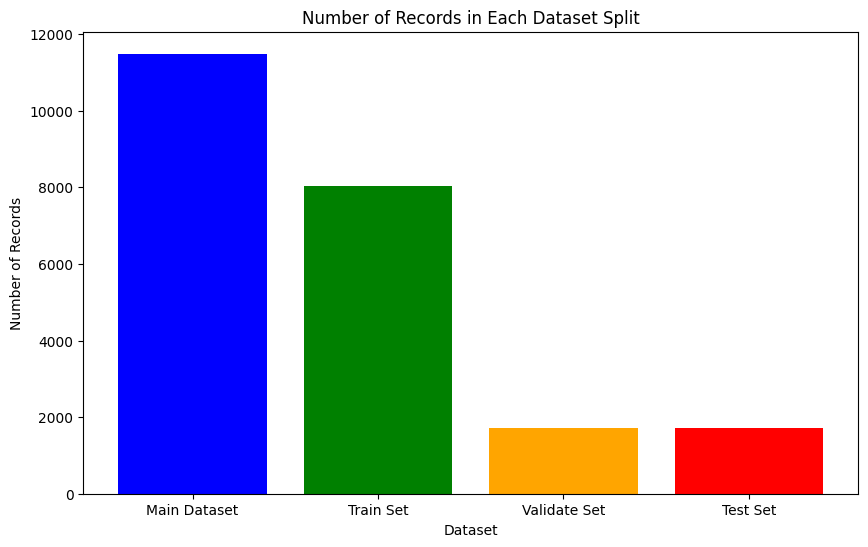

In [13]:
# Draw a bar graph
plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values(), color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Dataset')
plt.ylabel('Number of Records')
plt.title('Number of Records in Each Dataset Split')
plt.show()